In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Adding Datasets and preprocessing them for better understanding

In [11]:
df_1 = pd.read_csv("/Users/vishaldubey/Downloads/archive/Metadata_Country_API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_4701072.csv")
df_2 = pd.read_csv("/Users/vishaldubey/Downloads/archive/Metadata_Indicator_API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_4701072.csv")

In [12]:
df_1.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [ ]:
#Dropping unwanted column

In [14]:
raw = df_1.drop("Unnamed: 5", axis=1)

In [16]:
raw.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName'], dtype='object')

In [17]:
raw.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola


In [18]:
df_2.head()

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION,Unnamed: 4
0,NY.GDP.MKTP.KD.ZG,GDP growth (annual %),Annual percentage growth rate of GDP at market...,"World Bank national accounts data, and OECD Na...",NaN


In [20]:
raw_1 = df_2.drop("Unnamed: 4", axis =1)

In [21]:
raw_1.head()

,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
0,NY.GDP.MKTP.KD.ZG,GDP growth (annual %),Annual percentage growth rate of GDP at market...,"World Bank national accounts data, and OECD Na..."


In [ ]:
#Merging the two new dataframes into one

In [22]:
df = pd.concat([raw,raw_1], axis =1)

In [23]:
df.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,INDICATOR_CODE,INDICATOR_NAME,SOURCE_NOTE,SOURCE_ORGANIZATION
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NY.GDP.MKTP.KD.ZG,GDP growth (annual %),Annual percentage growth rate of GDP at market...,"World Bank national accounts data, and OECD Na..."
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN,NaN,NaN,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN,NaN,NaN,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN,NaN,NaN,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN,NaN,NaN,NaN


In [25]:
df.shape

(265, 9)

In [ ]:
#Looking at dataset we only require IncomeGroup, TableName & Region for EDA and visualization.

In [28]:
df['IncomeGroup'].value_counts()

High income            80
Lower middle income    54
Upper middle income    54
Low income             28
Name: IncomeGroup, dtype: int64

In [29]:
df['Region'].value_counts()

Europe & Central Asia         58
Sub-Saharan Africa            48
Latin America & Caribbean     42
East Asia & Pacific           37
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [30]:
df['TableName'].value_counts()

Aruba                   1
Other small states      1
Malaysia                1
North America           1
Namibia                 1
                       ..
Guyana                  1
High income             1
Hong Kong SAR, China    1
Honduras                1
Zimbabwe                1
Name: TableName, Length: 265, dtype: int64

In [ ]:
#As there are many unknown values in Income Group & Region which needs to be filtered out, so filling out all those places with '0'

In [34]:
Im = df[['IncomeGroup', 'Region', 'TableName']]
Im_1 = Im.fillna(0)
Im_1.head()

,IncomeGroup,Region,TableName
0,High income,Latin America & Caribbean,Aruba
1,0,0,Africa Eastern and Southern
2,Low income,South Asia,Afghanistan
3,0,0,Africa Western and Central
4,Lower middle income,Sub-Saharan Africa,Angola


In [35]:
Im_1.shape

(265, 3)

In [ ]:
#Calculate Income Category (as count) related to Region data) + Making barplot

In [46]:
A = Im_1.loc[Im_1["IncomeGroup"] == "High income", "Region"]
A.value_counts()

Europe & Central Asia         38
Latin America & Caribbean     17
East Asia & Pacific           13
Middle East & North Africa     8
North America                  3
Sub-Saharan Africa             1
Name: Region, dtype: int64

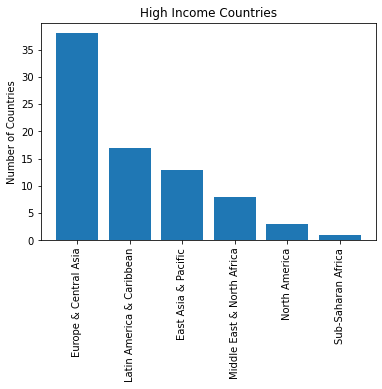

In [110]:
regions_1 = ['Europe & Central Asia', 'Latin America & Caribbean', 'East Asia & Pacific', 'Middle East & North Africa', 'North America', 'Sub-Saharan Africa']
counts_1 = [38, 17, 13, 8, 3, 1]
xcoords = np.arange(len(regions_1))
plt.bar(xcoords, counts_1, tick_label = regions_1)
plt.xticks(rotation = 90)
plt.ylabel('Number of Countries')
plt.title('High Income Countries')
plt.show()

In [45]:
B = Im_1.loc[Im_1["IncomeGroup"] == "Upper middle income", "Region"]
B.value_counts()

Latin America & Caribbean     19
Europe & Central Asia         16
East Asia & Pacific            9
Sub-Saharan Africa             6
Middle East & North Africa     3
South Asia                     1
Name: Region, dtype: int64

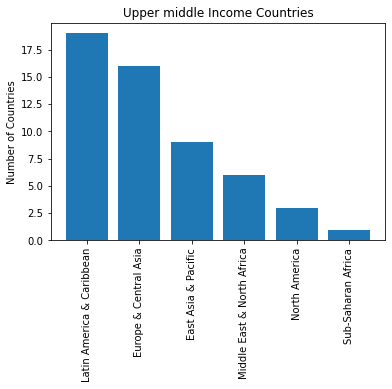

In [108]:
regions_2 = ['Latin America & Caribbean', 'Europe & Central Asia', 'East Asia & Pacific', 'Middle East & North Africa', 'North America', 'Sub-Saharan Africa']
counts_2 = [19, 16, 9, 6, 3, 1]
xcoords = np.arange(len(regions_2))
plt.bar(xcoords, counts_2, tick_label = regions_2)
plt.xticks(rotation = 90)
plt.ylabel('Number of Countries')
plt.title('Upper middle Income Countries')
plt.show()

In [69]:
C = Im_1.loc[Im_1['IncomeGroup'] == 'Lower middle income', 'Region']
C.value_counts()

Sub-Saharan Africa            17
East Asia & Pacific           14
Middle East & North Africa     8
South Asia                     6
Latin America & Caribbean      5
Europe & Central Asia          4
Name: Region, dtype: int64

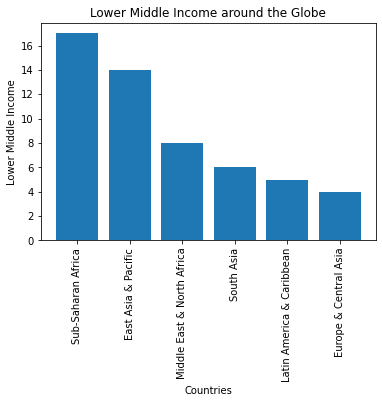

In [109]:
regions_3 = ['Sub-Saharan Africa', 'East Asia & Pacific', 'Middle East & North Africa', 'South Asia', 'Latin America & Caribbean', 'Europe & Central Asia']
counts_3 = [17, 14, 8, 6, 5, 4]

xcoords = np.arange(len(regions_3))
plt.bar(xcoords, counts_3, tick_label= regions_3)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.ylabel('Lower Middle Income')
plt.title('Lower Middle Income around the Globe')
plt.show()

In [75]:
D = Im_1.loc[Im_1['IncomeGroup'] == 'Low income', 'Region']
D.value_counts()

Sub-Saharan Africa            24
Middle East & North Africa     2
South Asia                     1
East Asia & Pacific            1
Name: Region, dtype: int64

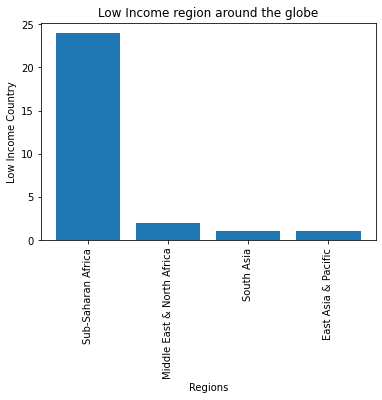

In [78]:
regions_4 = ['Sub-Saharan Africa', 'Middle East & North Africa', 'South Asia', 'East Asia & Pacific']
counts_4 = [24, 2, 1, 1]

xcoords = np.arange(len(regions_4))
plt.bar(xcoords, counts_4, tick_label = regions_4)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.ylabel('Low Income Country')
plt.title('Low Income region around the globe')
plt.show()

In [ ]:
#Calculate IncomeGroup (value counts) related to TableName/Country

In [79]:
E = Im_1.loc[Im_1['IncomeGroup'] == 'High income', 'TableName']
E.shape

(80,)

In [80]:
F = Im_1.loc[Im_1['IncomeGroup'] == 'Lower middle income', 'TableName']
F.shape

(54,)

In [81]:
G = Im_1.loc[Im_1['IncomeGroup'] == 'Upper middle income', 'TableName']
G.shape

(54,)

In [84]:
H = Im_1.loc[Im_1['IncomeGroup'] == 'Low income', 'TableName']
H.shape

(28,)

In [92]:
#Missing Data
I = Im_1.loc[Im_1['IncomeGroup'] == 0, 'TableName']
I.shape

(49,)

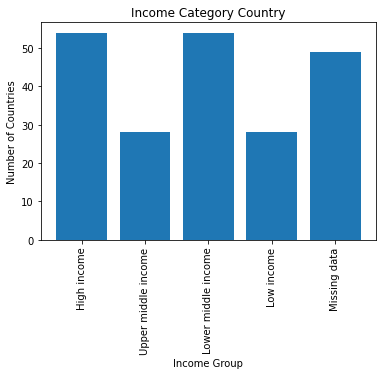

In [98]:
countries_ctg = ['High income', 'Upper middle income', 'Lower middle income', 'Low income', 'Missing data']
counts_5 = [54, 28, 54, 28, 49]

xcoords = np.arange(len(countries_ctg))
plt.bar(xcoords, counts_5, tick_label = countries_ctg)
plt.xticks(rotation = 90)
plt.xlabel('Income Group')
plt.ylabel('Number of Countries')
plt.title('Income Category Country')
plt.show()

In [112]:
#Ploting the Pie-chart as Income Category Visualization and Conclusion

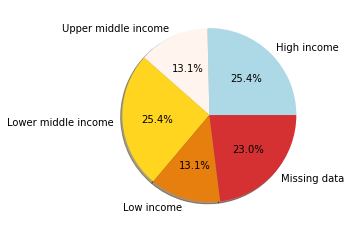

In [113]:
colors = ('#ADD8E6','#FFF5EE', '#FFD51F', '#E67F0D', '#D53032')
plt.pie(counts_5, labels = countries_ctg, autopct = '%1.1f%%', colors= colors, shadow = True)
plt.show()

In [ ]:
#Checking the correlation between IncomeGroup, Region & Country/ TableName

In [ ]:
Im_1['IncomeGroup'] = Im_1['IncomeGroup'].astype('category').cat.codes
Im_1['Region'] = Im_1['Region'].astype('category').cat.codes
corr1 = Im_1.corr()
Im_1['IncomeGroup'] = Im_1['IncomeGroup'].astype('category').cat.codes
Im_1['TableName'] = Im_1['TableName'].astype('category').cat.codes
corr2 = Im_1.corr()

In [107]:
print(corr1)
print(corr2)

             IncomeGroup    Region
IncomeGroup     1.000000  0.425935
Region          0.425935  1.000000
             IncomeGroup    Region  TableName
IncomeGroup     1.000000  0.425935  -0.030922
Region          0.425935  1.000000  -0.030761
TableName      -0.030922 -0.030761   1.000000


It is clear that High income and Lower middle income dominate the globe as per capita income of developed regions are significantly contributing more to income of working class people. 